In [54]:
# load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline



In [55]:
# load data
r2d0 = pd.read_csv('island-data-bottle-round-2/prices_round_2_day_-1.csv', sep = ';')
r2d1 = pd.read_csv('island-data-bottle-round-2/prices_round_2_day_0.csv', sep = ';')
r2d2 = pd.read_csv('island-data-bottle-round-2/prices_round_2_day_1.csv', sep = ';')

In [56]:
r2d0

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,PINA_COLADAS,14999,38,14998.0,53.0,NaN,NaN,15001,38,15002.0,53.0,NaN,NaN,15000.0,0.0
2,-1,0,COCONUTS,7999,162,NaN,NaN,NaN,NaN,8001,55,8002.0,107.0,NaN,NaN,8000.0,0.0
3,-1,0,BANANAS,4951,1,4946.0,2.0,4945.0,29.0,4952,31,NaN,NaN,NaN,NaN,4951.5,0.0
4,-1,100,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,-1,999800,PEARLS,9995,20,NaN,NaN,NaN,NaN,10002,10,10005.0,20.0,NaN,NaN,9998.5,-760.0
39996,-1,999900,PINA_COLADAS,15228,102,NaN,NaN,NaN,NaN,15231,102,NaN,NaN,NaN,NaN,15229.5,-483648.0
39997,-1,999900,COCONUTS,8113,178,NaN,NaN,NaN,NaN,8115,76,8116.0,102.0,NaN,NaN,8114.0,-791928.0
39998,-1,999900,BANANAS,4892,31,NaN,NaN,NaN,NaN,4898,31,NaN,NaN,NaN,NaN,4895.0,216680.0


In [57]:
def update_timestamp(df):
    df['timestamp'] = df['day']*100*10000+df['timestamp']
    df.drop(['day'], axis = 1, inplace = True)
    return df

In [58]:
r2d0_shift = update_timestamp(r2d0)
r2d1_shift = update_timestamp(r2d1)
r2d2_shift = update_timestamp(r2d2)

In [59]:
# merge the three dataframes into one
r2 = pd.concat([r2d0_shift, r2d1_shift, r2d2_shift], axis = 0)

In [60]:
r2_pearls = r2[r2['product']=='PEARLS'].copy()
r2_bananas = r2[r2['product']=='BANANAS'].copy()

In [61]:
r2_pearls.head(5)

,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1000000,PEARLS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
4,-999900,PEARLS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,4.0
11,-999800,PEARLS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,4.0
12,-999700,PEARLS,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,4.0
17,-999600,PEARLS,9996,2,9995.0,25.0,NaN,NaN,10004,2,10005.0,25.0,NaN,NaN,10000.0,4.0


In [62]:
def get_df(df):
    df = df[['timestamp', 'product', 'mid_price', 'bid_price_1', 'ask_price_1', 'bid_volume_1', 'ask_volume_1']].copy()
    df['mid_price'] = df['mid_price'].astype(float)
    df['bid_price_1'] = df['bid_price_1'].astype(float)
    df['ask_price_1'] = df['ask_price_1'].astype(float)
    df['bid_volume_1'] = df['bid_volume_1'].astype(float)
    df['ask_volume_1'] = df['ask_volume_1'].astype(float)

    df['imb'] = df['bid_volume_1'].astype(float)/(df['bid_volume_1'].astype(float)+df['ask_volume_1'].astype(float))
    df['wmid'] = df['ask_price_1'].astype(float)*df['imb']+df['bid_price_1'].astype(float)*(1-df['imb'])
    df.rename(columns = {'mid_price':'mid', 'bid_price_1':'bid', 'ask_price_1':'ask', 'bid_volume_1':'bs', 'ask_volume_1':'as','timestamp':'time'}, inplace = True)
    return df.reset_index(drop = True)

In [63]:
from scipy.linalg import block_diag

In [64]:
def prep_data_sym(T,n_imb,dt,n_spread):
    spread=T.ask-T.bid
    ticksize=np.round(min(spread.loc[spread>0])*100)/100
    T.spread=T.ask-T.bid
    # adds the spread and mid prices
    T['spread']=np.round((T['ask']-T['bid'])/ticksize)*ticksize
    T['mid']=(T['bid']+T['ask'])/2
    #filter out spreads >= n_spread
    T = T.loc[(T.spread <= n_spread*ticksize) & (T.spread>0)]
    T['imb']=T['bs']/(T['bs']+T['as'])
    #discretize imbalance into percentiles
    T['imb_bucket'] = pd.qcut(T['imb'], n_imb, labels=False)
    T['next_mid']=T['mid'].shift(-dt)
    #step ahead state variables
    T['next_spread']=T['spread'].shift(-dt)
    T['next_time']=T['time'].shift(-dt)
    T['next_imb_bucket']=T['imb_bucket'].shift(-dt)
    # step ahead change in price
    T['dM']=np.round((T['next_mid']-T['mid'])/ticksize*2)*ticksize/2
    T = T.loc[(T.dM <= ticksize*1.1) & (T.dM>=-ticksize*1.1)]
    # symetrize data
    T2 = T.copy(deep=True)
    T2['imb_bucket']=n_imb-1-T2['imb_bucket']
    T2['next_imb_bucket']=n_imb-1-T2['next_imb_bucket']
    T2['dM']=-T2['dM']
    T2['mid']=-T2['mid']
    T3=pd.concat([T,T2])
    T3.index = pd.RangeIndex(len(T3.index)) 
    return T3,ticksize

In [65]:
T,ticksize = prep_data_sym(r2_bananas, n_imb=10, dt = 1, n_spread = 2)

AttributeError: 'DataFrame' object has no attribute 'ask'

In [66]:
def estimate(T):
    no_move=T[T['dM']==0]
    no_move_counts=no_move.pivot_table(index=[ 'next_imb_bucket'], 
                     columns=['spread', 'imb_bucket'], 
                     values='time',
                     fill_value=0, 
                     aggfunc='count').unstack()
    Q_counts=np.resize(np.array(no_move_counts[0:(n_imb*n_imb)]),(n_imb,n_imb))
    # loop over all spreads and add block matrices
    for i in range(1,n_spread):
        Qi=np.resize(np.array(no_move_counts[(i*n_imb*n_imb):(i+1)*(n_imb*n_imb)]),(n_imb,n_imb))
        Q_counts=block_diag(Q_counts,Qi)
    #print Q_counts
    move_counts=T[(T['dM']!=0)].pivot_table(index=['dM'], 
                         columns=['spread', 'imb_bucket'], 
                         values='time',
                         fill_value=0, 
                         aggfunc='count').unstack()

    R_counts=np.resize(np.array(move_counts),(n_imb*n_spread,4))
    T1=np.concatenate((Q_counts,R_counts),axis=1).astype(float)
    for i in range(0,n_imb*n_spread):
        T1[i]=T1[i]/T1[i].sum()
    Q=T1[:,0:(n_imb*n_spread)]
    R1=T1[:,(n_imb*n_spread):]

    K=np.array([-0.01, -0.005, 0.005, 0.01])
    move_counts=T[(T['dM']!=0)].pivot_table(index=['spread','imb_bucket'], 
                     columns=['next_spread', 'next_imb_bucket'], 
                     values='time',
                     fill_value=0, 
                     aggfunc='count') #.unstack()

    R2_counts=np.resize(np.array(move_counts),(n_imb*n_spread,n_imb*n_spread))
    T2=np.concatenate((Q_counts,R2_counts),axis=1).astype(float)

    for i in range(0,n_imb*n_spread):
        T2[i]=T2[i]/T2[i].sum()
    R2=T2[:,(n_imb*n_spread):]
    Q2=T2[:,0:(n_imb*n_spread)]
    G1=np.dot(np.dot(np.linalg.inv(np.eye(n_imb*n_spread)-Q),R1),K)
    B=np.dot(np.linalg.inv(np.eye(n_imb*n_spread)-Q),R2)
    
    return G1,B,Q,Q2,R1,R2,K

In [67]:
def plot_Gstar(ticker,G1,B,T):
    G2=np.dot(B,G1)+G1
    G3=G2+np.dot(np.dot(B,B),G1)
    G4=G3+np.dot(np.dot(np.dot(B,B),B),G1)
    G5=G4+np.dot(np.dot(np.dot(np.dot(B,B),B),B),G1)
    G6=G5+np.dot(np.dot(np.dot(np.dot(np.dot(B,B),B),B),B),G1)
    plt.plot(imb,np.linspace(-0.005,0.005,n_imb)*0,label='Mid adj',marker='o')
    plt.plot(imb,np.linspace(-0.005,0.005,n_imb),label='Weighted mid adj',marker='o')
    for i in range(0,n_spread):
        plt.plot(imb,G6[(0+i*n_imb):(n_imb+i*n_imb)],label="spread = "+str(i+1)+" tick adj",marker='o')
    plt.ylim(-0.005,0.005)
    plt.legend(loc='upper left')
    plt.title(ticker+' adjustments')
    plt.xlabel('Imbalance')
    return G6

In [72]:
n_imb=10
n_spread=2
dt=1
data=get_df(r2_bananas) 
ticker='BANANAS'
pd.set_option('mode.chained_assignment', None)
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
T,ticksize=prep_data_sym(data,n_imb,dt,n_spread)

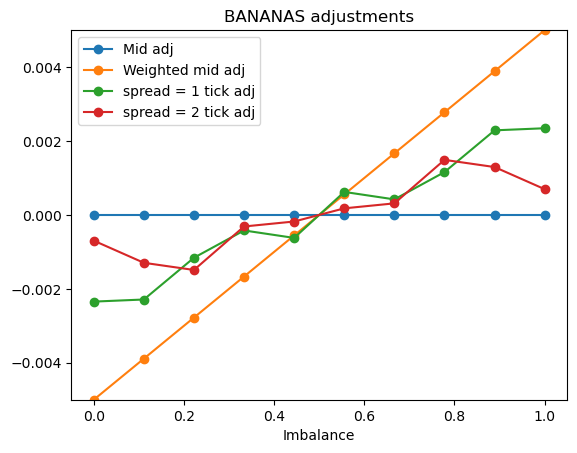

In [73]:
imb=np.linspace(0,1,n_imb)
G1,B,Q,Q2,R1,R2,K=estimate(T)
G6=plot_Gstar(ticker,G1,B,T)

Text(0.5, 0, 'Imbalance')

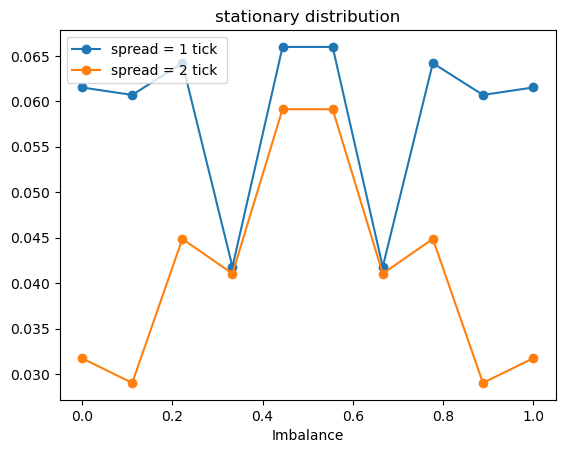

In [74]:
W=np.linalg.matrix_power(B,100)
for i in range(0,n_spread):
    plt.plot(imb,W[0][(0+i*n_imb):(n_imb+i*n_imb)],label="spread = "+str(i+1)+" tick ",marker='o')
    
plt.legend(loc='upper left')
plt.title('stationary distribution')
plt.xlabel('Imbalance')

In [75]:
G6

array([-0.00234525, -0.00228844, -0.00115853, -0.00042027, -0.00062218,
        0.00062218,  0.00042027,  0.00115853,  0.00228844,  0.00234525,
       -0.00069648, -0.00129538, -0.00148937, -0.00031284, -0.00017806,
        0.00017806,  0.00031284,  0.00148937,  0.00129538,  0.00069648])

In [51]:
n_imb=4
n_spread=4
dt=1
data=get_df(r2_pearls) 
ticker='PEARLS'
T,ticksize=prep_data_sym(data,n_imb,dt,n_spread)
imb=np.linspace(0,1,n_imb)
G1,B,Q,Q2,R1,R2,K=estimate(T)

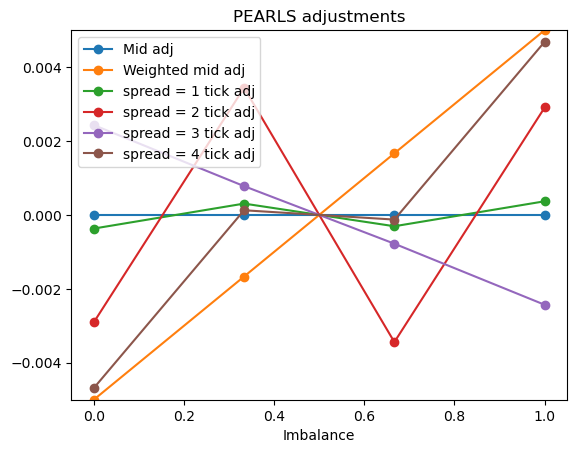

In [52]:
G6=plot_Gstar(ticker,G1,B,T)

Text(0.5, 0, 'Imbalance')

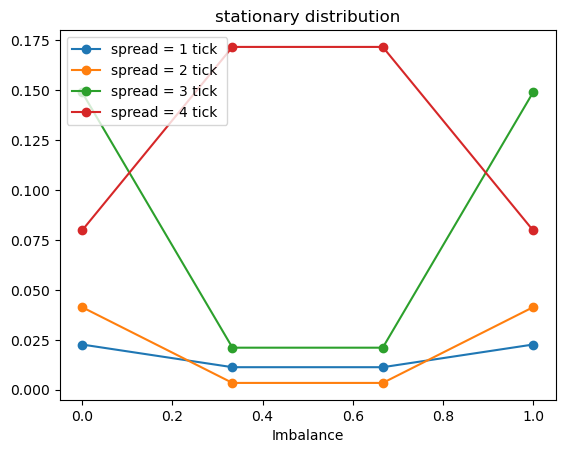

In [53]:
W=np.linalg.matrix_power(B,100)
for i in range(0,n_spread):
    plt.plot(imb,W[0][(0+i*n_imb):(n_imb+i*n_imb)],label="spread = "+str(i+1)+" tick ",marker='o')
    
plt.legend(loc='upper left')
plt.title('stationary distribution')
plt.xlabel('Imbalance')